Import the packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


# Load your dataset
df = pd.read_csv('Churn_Modelling[1].csv')

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Check the datatypes, if any encoding is needed , it needs to be done

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

check for missing values


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df_hotcoded = pd.get_dummies(df)
df_hotcoded.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
features = df_hotcoded.drop(columns= ["Exited"])
label = df_hotcoded["Exited"]


Removing the outliers , it increases the accuracy

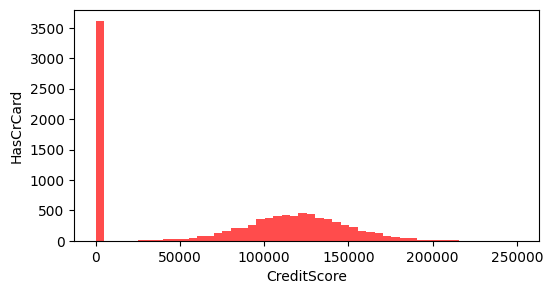

In [ ]:
outlier_threshold = 3
zscore = np.abs((df['Balance'] - df['Balance'].mean()) / df['Balance'].std())
outliers = zscore > outlier_threshold
df = df[~outliers]
plt.figure(figsize=(6, 3))
plt.hist(df['Balance'], bins=50, color='red', alpha=0.7)
plt.xlabel('CreditScore')
plt.ylabel('HasCrCard')
plt.show()


Spliting the dataset for training and testing


In [ ]:
x = df.drop('Exited', axis=1)#removing target variable
y = df['Exited']
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)



#Model Training and Evalution



LogisticRegression


In [ ]:
model = LogisticRegression(solver='liblinear')

model.fit(x_train, y_train)

predictions = model.predict(x_test)
predict_proba = model.predict_proba(x_test)
acc = accuracy_score(y_test, predictions)

print(acc)

0.8035


KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
acc = accuracy_score(y_test, predictions)
f1_Score = f1_score(y_test, predictions)

print(acc)
print(f1_Score)

0.788
0.09401709401709403


RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier(n_estimators=200, random_state=42)
rd.fit(x_train, y_train)
y_pred = rd.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.856
